## World Happiness Case Study
---
Leopoldine Mirtil

### Objective
The goal of this project is to clean, analyze and visualize the world happiness data in order to complete the tasks.

### Tasks
* Identify the overall top and bottom 10 ranked happiest countries

* Identify the regions that consistently contain the top & bottom-ranked happiest countries.

* Which countries have experienced the highest happiness increase and decrease between 2015-2019? 

* Analyze the relationship between overall happiness and social metrics(economy, family, health, trust, generosity, freedom, and dystopia residual).

### Source Data
The data used in this analysis was made publicly available by Sustainable Development Solutions Network on [Kaggle.com](https://www.kaggle.com/datasets/unsdsn/world-happiness). It reports the  the extent of which several factors (economy, family, health, trust, generosity, freedom, dystopia residual) contribute to the overall happiness score and ranking of countries from 2015 to 2019. 

## Step 1 - Get Data

### Load Packages & Import Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

y15 = pd.read_csv("2015.csv")
y16 = pd.read_csv("2016.csv")
y17 = pd.read_csv("2017.csv")
y18 = pd.read_csv("2018.csv")
y19 = pd.read_csv("2019.csv")

### Inspect Data


In [ ]:
#check df sizes: (row, col)
print('2015:', y15.shape) 
print('2016:', y16.shape)
print('2017:', y17.shape)
print('2018:', y18.shape)
print('2019:', y19.shape)

2015: (158, 12)
2016: (157, 13)
2017: (155, 12)
2018: (156, 9)
2019: (156, 9)


In [ ]:
#list of column names 
print("2015:", list(y15.columns)) 
print("2016:", list(y16.columns))
print("2017:", list(y17.columns))
print("2018:", list(y18.columns))
print("2019:", list(y19.columns))

2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2019: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social sup

## Step 2 - Clean & Manipulate Data
### Remove Unneeded Columns

In [ ]:
y15 = y15.drop(columns=['Standard Error'])
y16 = y16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'])
y17 = y17.drop(columns=['Whisker.high', 'Whisker.low'])

### Rename Columns

In [ ]:
#rename to closely match 2015 & 2016
y17 = y17.rename(columns={'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score', 
                          'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 'Health..Life.Expectancy.':'Health (Life Expectancy)', 
                          'Trust..Government.Corruption.':'Trust (Government Corruption)', 'Dystopia.Residual':'Dystopia Residual'}) 

y18 = y18.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 
                       'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)',
                       'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)',
                       'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})

y19 = y19.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 
                       'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)',
                       'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)',
                       'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})

### Add Year Column to Files

In [ ]:
#add year columns to each df 
y15['Year'] = 2015
y16['Year'] = 2016
y17['Year'] = 2017
y18['Year'] = 2018
y19['Year'] = 2019

### Adjust Column Orders

In [ ]:
#move year column to first position for 2015 & 2016 files
first_15 = y15.pop('Year')
y15.insert(0, 'Year', first_15)

first_16 = y16.pop('Year')
y16.insert(0, 'Year', first_16)


#change order of remaining dfs to closely match those of 2015 & 2016
co17 = ['Year', 'Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
             'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

col_order = ['Year', 'Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
             'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']


#change column order
y17 = y17[co17]
y18 = y18[col_order]
y19 = y19[col_order]

#confirm changes
print("2015:", list(y15.columns)) 
print("2016:", list(y16.columns))
print("2017:", list(y17.columns)) 
print("2018:", list(y18.columns))
print("2019:", list(y19.columns)) 

2015: ['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2016: ['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2017: ['Year', 'Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2018: ['Year', 'Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
2019: ['Year', 'Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption

### Check for Missing Values

In [ ]:
y15.isna().sum()

Year                             0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
y16.isna().sum()

Year                             0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
y17.isna().sum()

Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
y18.isna().sum()

Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [ ]:
y19.isna().sum()

Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

#### Remove Null Values

In [ ]:
y18.dropna(how = 'any', inplace = True)

#verify 
y18.isnull().sum()

Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

### Merge Data Files

In [ ]:
#create list of dfs 
df_list = [y15, y16, y17, y18, y19] 

#combine dfs 
world_df = pd.concat(df_list, join='outer').reset_index(drop=True)

#view new df
display(world_df)

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
776,2019,Rwanda,NaN,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN
777,2019,Tanzania,NaN,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN
778,2019,Afghanistan,NaN,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN
779,2019,Central African Republic,NaN,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN


### Fill Missing Region Values
#### Create Dictionary from Data Frame Columns

In [ ]:
#create list from Country Column
country_list = list(world_df['Country'])

#create list with unique values of countries
countries = []

for x in country_list:
    if x not in countries:
        countries.append(x)

#sort list alphabetically 
countries = sorted(list(countries))

#view list and review elements
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hong Kong S.A.R., China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo'

In [ ]:
#replace  following Country values from list: 
vals_replace = {'Hong Kong S.A.R., China' : 'Hong Kong',
                'Northern Cyprus' : 'North Cyprus',
                'Somaliland region' : 'Somaliland Region',
                'Taiwan Province of China' : 'Taiwan',
                'Trinidad & Tobago' : 'Trinidad and Tobago'}

#update df
world_df = world_df.replace({'Country': vals_replace}) 


#create dict with unique key & vals by grouping pairs
w_dict = world_df.groupby('Country')['Region'].unique().apply(list).to_dict()

#update dict for keys w/ nan values: North Macedonia & Gambia
w_dict.update({'North Macedonia': ['Central and Eastern Europe'], 'Gambia': ['Sub-Saharan Africa']})


#initialize lists for dict
key = []
val = []

#update lists for unique key-value pairs 
for x in list(w_dict.items()):
    k = x[0]
    v = x[1][0] 
    key.append(k) 
    val.append(v)

#create final dict w/key-value lists
location = dict(zip(key, val))
location

{'Afghanistan': 'Southern Asia',
 'Albania': 'Central and Eastern Europe',
 'Algeria': 'Middle East and Northern Africa',
 'Angola': 'Sub-Saharan Africa',
 'Argentina': 'Latin America and Caribbean',
 'Armenia': 'Central and Eastern Europe',
 'Australia': 'Australia and New Zealand',
 'Austria': 'Western Europe',
 'Azerbaijan': 'Central and Eastern Europe',
 'Bahrain': 'Middle East and Northern Africa',
 'Bangladesh': 'Southern Asia',
 'Belarus': 'Central and Eastern Europe',
 'Belgium': 'Western Europe',
 'Belize': 'Latin America and Caribbean',
 'Benin': 'Sub-Saharan Africa',
 'Bhutan': 'Southern Asia',
 'Bolivia': 'Latin America and Caribbean',
 'Bosnia and Herzegovina': 'Central and Eastern Europe',
 'Botswana': 'Sub-Saharan Africa',
 'Brazil': 'Latin America and Caribbean',
 'Bulgaria': 'Central and Eastern Europe',
 'Burkina Faso': 'Sub-Saharan Africa',
 'Burundi': 'Sub-Saharan Africa',
 'Cambodia': 'Southeastern Asia',
 'Cameroon': 'Sub-Saharan Africa',
 'Canada': 'North America

#### Replace NA Values with Dictionary

In [ ]:
#current NA count
world_df['Region'].isna().sum()

466

In [ ]:
### replace missing values in Region w/dictionary
world_df['Region'] = world_df['Country'].map(location)

## confirm change 
world_df['Region'].isna().sum()

0

In [ ]:
# view complete df 
display(world_df)

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
776,2019,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN
777,2019,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN
778,2019,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN
779,2019,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN


### Export Modifed Data Frame

In [ ]:
world_df.to_csv('world_happiness_2015_2019.csv', index=False)   

## Step 3 - Data Analysis

In [ ]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           781 non-null    int64  
 1   Country                        781 non-null    object 
 2   Region                         781 non-null    object 
 3   Happiness Rank                 781 non-null    int64  
 4   Happiness Score                781 non-null    float64
 5   Economy (GDP per Capita)       781 non-null    float64
 6   Family                         781 non-null    float64
 7   Health (Life Expectancy)       781 non-null    float64
 8   Freedom                        781 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     781 non-null    float64
 11  Dystopia Residual              470 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 7

### Statistical Summary 

In [ ]:
#summary of numerical/non-year columns
world_df.iloc[:,4:12].describe().round(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,781.00,781.00,781.00,781.00,781.00,781.00,781.00,470.00
mean,5.38,0.91,1.08,0.61,0.41,0.13,0.22,2.09
std,1.13,0.41,0.33,0.25,0.15,0.11,0.12,0.57
min,2.69,0.00,0.00,0.00,0.00,0.00,0.00,0.33
25%,4.51,0.60,0.87,0.44,0.31,0.05,0.13,1.74
50%,5.32,0.98,1.12,0.65,0.43,0.09,0.20,2.09
75%,6.18,1.23,1.33,0.81,0.53,0.16,0.28,2.46
max,7.77,1.87,1.64,1.14,0.72,0.55,0.84,3.84


### Average Values of Happiness Metrics

In [ ]:
world_df.iloc[:,4:12].mean()

Happiness Score                  5.377232
Economy (GDP per Capita)         0.914537
Family                           1.078780
Health (Life Expectancy)         0.612342
Freedom                          0.411254
Trust (Government Corruption)    0.125436
Generosity                       0.218618
Dystopia Residual                2.092717
dtype: float64

### Average Values of Happiness Metrics by Year

In [ ]:
world_df.iloc[:,[0,4, 5, 6, 7, 8, 9, 10,11]].groupby('Year').mean().reset_index()

,Year,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
1,2016,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
2,2017,5.354019,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883,1.850238
3,2018,5.366897,0.883677,1.216058,0.596877,0.455606,0.112000,0.180974,NaN
4,2019,5.407096,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846,NaN


### Country Count per Region

In [ ]:
#select regions and matching countries 
reg_n = world_df.groupby('Region')['Country'].unique().to_frame().reset_index() 

#get country count from list & replace values
reg_n['Country'] = reg_n['Country'].str.len() 

#sort df by value
reg_n.rename(columns={'Country':'Country No.'}).sort_values('Country No.').reset_index(drop=True)

,Region,Country No.
0,Australia and New Zealand,2
1,North America,2
2,Eastern Asia,6
3,Southern Asia,7
4,Southeastern Asia,9
5,Middle East and Northern Africa,20
6,Western Europe,21
7,Latin America and Caribbean,24
8,Central and Eastern Europe,30
9,Sub-Saharan Africa,44


### Happiness Rank Analysis

##### Overall Top & Bottom 10 Ranked Happiest Countries by Average Happiness Rank

In [ ]:
#top 10 by avg happiness rank
world_df.groupby(['Country', 'Region'])['Happiness Rank'].mean().nsmallest(10).reset_index()

,Country,Region,Happiness Rank
0,Denmark,Western Europe,2.2
1,Norway,Western Europe,2.8
2,Iceland,Western Europe,3.2
3,Finland,Western Europe,3.6
4,Switzerland,Western Europe,3.6
5,Netherlands,Western Europe,6.2
6,Canada,North America,6.8
7,New Zealand,Australia and New Zealand,8.2
8,Sweden,Western Europe,8.6
9,Australia,Australia and New Zealand,10.0


In [ ]:
#bot 10 by avg happiness rank
world_df.groupby(['Country', 'Region'])['Happiness Rank'].mean().nlargest(10).reset_index()

,Country,Region,Happiness Rank
0,Burundi,Sub-Saharan Africa,153.80
1,Central African Republic,Sub-Saharan Africa,153.25
2,Syria,Middle East and Northern Africa,152.60
3,Rwanda,Sub-Saharan Africa,152.00
4,Tanzania,Sub-Saharan Africa,150.80
5,South Sudan,Sub-Saharan Africa,150.00
6,Afghanistan,Southern Asia,149.40
7,Togo,Sub-Saharan Africa,148.20
8,Yemen,Middle East and Northern Africa,146.40
9,Madagascar,Sub-Saharan Africa,145.00


#### Top & Bottom 10 Ranked Happiest Countries by Year

In [ ]:
#annual top 10s 
tops10=world_df.loc[world_df['Happiness Rank']<=10, ('Year', 'Happiness Rank', 'Country','Region')].reset_index(drop=True)
t10 = tops10.melt(id_vars=['Happiness Rank', 'Year'], value_vars=['Country', 'Region'], value_name='Geography', var_name='Area').sort_values(['Happiness Rank', 'Year'])
yrs_top10 = t10.pivot(index='Happiness Rank', columns=['Year','Area'])

#remove geo header
yrs_top10.columns = yrs_top10.columns.droplevel(0) 
yrs_top10

Year                   2015                                    2016  \
Area                Country                     Region      Country   
Happiness Rank                                                        
1               Switzerland             Western Europe      Denmark   
2                   Iceland             Western Europe  Switzerland   
3                   Denmark             Western Europe      Iceland   
4                    Norway             Western Europe       Norway   
5                    Canada              North America      Finland   
6                   Finland             Western Europe       Canada   
7               Netherlands             Western Europe  Netherlands   
8                    Sweden             Western Europe  New Zealand   
9               New Zealand  Australia and New Zealand    Australia   
10                Australia  Australia and New Zealand       Sweden   

Year                                              2017  \
Area                               Region      Country   
Happiness Rank                                           
1                          Western Europe       Norway   
2                          Western Europe      Denmark   
3                          Western Europe      Iceland   
4                          Western Europe  Switzerland   
5                          Western Europe      Finland   
6                           North America  Netherlands   
7                          Western Europe       Canada   
8               Australia and New Zealand  New Zealand   
9               Australia and New Zealand       Sweden   
10                         Western Europe    Australia   

Year                                              2018  \
Area                               Region      Country   
Happiness Rank                                           
1                          Western Europe      Finland   
2                          Western Europe       Norway   
3                          Western Europe      Denmark   
4                          Western Europe      Iceland   
5                          Western Europe  Switzerland   
6                          Western Europe  Netherlands   
7                           North America       Canada   
8               Australia and New Zealand  New Zealand   
9                          Western Europe       Sweden   
10              Australia and New Zealand    Australia   

Year                                              2019  \
Area                               Region      Country   
Happiness Rank                                           
1                          Western Europe      Finland   
2                          Western Europe      Denmark   
3                          Western Europe       Norway   
4                          Western Europe      Iceland   
5                          Western Europe  Netherlands   
6                          Western Europe  Switzerland   
7                           North America       Sweden   
8               Australia and New Zealand  New Zealand   
9                          Western Europe       Canada   
10              Australia and New Zealand      Austria   

Year                                       
Area                               Region  
Happiness Rank                             
1                          Western Europe  
2                          Western Europe  
3                          Western Europe  
4                          Western Europe  
5                          Western Europe  
6                          Western Europe  
7                          Western Europe  
8               Australia and New Zealand  
9                           North America  
10                         Western Europe

In [ ]:
#annual bottom 10 countries and regions 
bot10s = world_df[['Year', 'Happiness Rank', 'Country', 'Region']].groupby(['Year']).tail(10).reset_index(drop=True)

#replace existing Happiness Rank w/ range seq (1-10) seq
##create rank list for 1 - 10
rk_range = list(range(1, 11))

##repeat list x5 (per yr) in order and w/nums seperated by commas
ranks = [n for n in np.tile(rk_range, 5)] 

##replace existing Happiness Rank vals with the (1-10) seq
bot10s['Happiness Rank'] = ranks

b10 = bot10s.melt(id_vars=['Happiness Rank', 'Year'], value_vars=['Country', 'Region'], value_name='Geography', var_name='Area').sort_values(['Year', 'Happiness Rank'], ascending=[True, True])

yrs_bot10  = b10.pivot(index='Happiness Rank', columns=['Year','Area'])

#remove header
yrs_bot10.columns = yrs_bot10.columns.droplevel(0) 

display(yrs_bot10)

Year                    2015                                          2016  \
Area                 Country                           Region      Country   
Happiness Rank                                                               
1                       Chad               Sub-Saharan Africa   Madagascar   
2                     Guinea               Sub-Saharan Africa     Tanzania   
3                Ivory Coast               Sub-Saharan Africa      Liberia   
4               Burkina Faso               Sub-Saharan Africa       Guinea   
5                Afghanistan                    Southern Asia       Rwanda   
6                     Rwanda               Sub-Saharan Africa        Benin   
7                      Benin               Sub-Saharan Africa  Afghanistan   
8                      Syria  Middle East and Northern Africa         Togo   
9                    Burundi               Sub-Saharan Africa        Syria   
10                      Togo               Sub-Saharan Africa      Burundi   

Year                                                                 2017  \
Area                                     Region                   Country   
Happiness Rank                                                              
1                            Sub-Saharan Africa                     Yemen   
2                            Sub-Saharan Africa               South Sudan   
3                            Sub-Saharan Africa                   Liberia   
4                            Sub-Saharan Africa                    Guinea   
5                            Sub-Saharan Africa                      Togo   
6                            Sub-Saharan Africa                    Rwanda   
7                                 Southern Asia                     Syria   
8                            Sub-Saharan Africa                  Tanzania   
9               Middle East and Northern Africa                   Burundi   
10                           Sub-Saharan Africa  Central African Republic   

Year                                                                 2018  \
Area                                     Region                   Country   
Happiness Rank                                                              
1               Middle East and Northern Africa                    Malawi   
2                            Sub-Saharan Africa                     Haiti   
3                            Sub-Saharan Africa                   Liberia   
4                            Sub-Saharan Africa                     Syria   
5                            Sub-Saharan Africa                    Rwanda   
6                            Sub-Saharan Africa                     Yemen   
7               Middle East and Northern Africa                  Tanzania   
8                            Sub-Saharan Africa               South Sudan   
9                            Sub-Saharan Africa  Central African Republic   
10                           Sub-Saharan Africa                   Burundi   

Year                                                                 2019  \
Area                                     Region                   Country   
Happiness Rank                                                              
1                            Sub-Saharan Africa                     Haiti   
2                   Latin America and Caribbean                  Botswana   
3                            Sub-Saharan Africa                     Syria   
4               Middle East and Northern Africa                    Malawi   
5                            Sub-Saharan Africa                     Yemen   
6               Middle East and Northern Africa                    Rwanda   
7                            Sub-Saharan Africa                  Tanzania   
8                            Sub-Saharan Africa               Afghanistan   
9                            Sub-Saharan Africa  Central African Republic   
10                           Sub-Saharan Africa          

#### Most Frequent Region Among Annual Ranked Countries

In [ ]:
#freq region in annual top 10s
tops10['Region'].mode()

0    Western Europe
Name: Region, dtype: object

In [ ]:
#freq region in annual bottom 10s
bot10s['Region'].mode()

0    Sub-Saharan Africa
Name: Region, dtype: object

### Annual Percent Changes 

##### Annual Percent Changes in Happiness Factors

In [ ]:
## filter df for total metrics by year
yr_metrics = world_df.iloc[:,[0,4, 5, 6, 7, 8, 9, 10,11]].groupby('Year').sum().reset_index()

#transpose df
all_mets =  yr_metrics.T 
#convert year row to col headers 
all_mets.columns = [int(x) for x in all_mets.iloc[0]] 
 #drop unneeded year row 
all_yrs = all_mets.drop(all_mets.index[0])
#reset index and rename cols
annual_df = all_yrs.reset_index().rename(columns={'index':'Metrics'}) 

#calc perc change from 2015-2019 
ch16 = list((((annual_df[2016]-annual_df[2015])/annual_df[2015])*100))
ch17 = list((((annual_df[2017]-annual_df[2016])/annual_df[2016])*100))
ch18 = list((((annual_df[2018]-annual_df[2017])/annual_df[2017])*100))
ch19 = list((((annual_df[2019]-annual_df[2018])/annual_df[2018])*100))
all_sm = list((((annual_df[2019]-annual_df[2015])/annual_df[2015])*100))

data = {
    2016: ch16,
    2017: ch17,
    2018: ch18,
    2019: ch19,
    'Overall': all_sm}

#create list of metrics
metrics_list =[x for x in annual_df['Metrics']]

#create perc change df
perc_ch = pd.DataFrame(data, index=metrics_list).map("{:,.2f}%".format).replace('nan%', ' ')
perc_ch

,2016,2017,2018,2019,Overall
Happiness Score,-0.51%,-1.79%,0.24%,1.40%,-0.69%
Economy (GDP per Capita),12.02%,1.92%,-10.26%,3.09%,5.62%
Family,-20.43%,47.90%,2.28%,0.05%,20.43%
Health (Life Expectancy),-12.09%,-2.39%,8.26%,22.29%,13.61%
Freedom,-13.99%,8.78%,11.45%,-13.28%,-9.57%
Trust (Government Corruption),-4.65%,-11.68%,-9.03%,-0.61%,-23.86%
Generosity,1.60%,0.45%,-26.70%,2.80%,-23.09%
Dystopia Residual,10.11%,-21.46%,-100.00%,,-100.00%


##### Annual Happiness Percent Changes in Regions

In [ ]:
#calc perc change of happiness score by region
reg_yrs = world_df.iloc[:,[0,2, 4]].groupby(['Region', 'Year']).sum().reset_index()

#pivot data 
reg_pivot = reg_yrs.pivot(index='Region', columns='Year')

#edit col headers to only show year
reg_pivot.columns = [2015, 2016, 2017, 2018, 2019]

#reset index
annual_reg = reg_pivot.reset_index()

#calc annual perc change 
r_ch16 = list((((annual_reg[2016]-annual_reg[2015])/annual_reg[2015])*100))
r_ch17 = list((((annual_reg[2017]-annual_reg[2016])/annual_reg[2016])*100))
r_ch18 = list((((annual_reg[2018]-annual_reg[2017])/annual_reg[2017])*100))
r_ch19 = list((((annual_reg[2019]-annual_reg[2018])/annual_reg[2018])*100))
all_regs = list((((annual_reg[2019]-annual_reg[2015])/annual_reg[2015])*100))

#combine lists as dict w/ years as key
reg_data = {
    2016: r_ch16,
    2017: r_ch17,
    2018: r_ch18,
    2019: r_ch19,
    'Overall': all_regs}

#create region list
reg_list =[x for x in annual_reg['Region']]

#create regional perc change df
reg_perc_ch = pd.DataFrame(reg_data, index=reg_list).map("{:,.2f}%".format)
reg_perc_ch

,2016,2017,2018,2019,Overall
Australia and New Zealand,0.53%,-0.33%,-0.01%,-0.42%,-0.24%
Central and Eastern Europe,0.71%,0.73%,1.00%,1.79%,4.29%
Eastern Asia,-0.04%,0.40%,0.45%,0.30%,1.11%
Latin America and Caribbean,8.33%,-10.50%,-0.13%,-4.48%,-7.50%
Middle East and Northern Africa,-5.37%,-0.30%,-8.26%,6.31%,-7.99%
North America,-0.26%,-1.37%,-0.66%,-0.31%,-2.58%
Southeastern Asia,0.40%,-9.35%,9.78%,-0.75%,-0.82%
Southern Asia,-0.38%,1.43%,-0.53%,-1.67%,-1.18%
Sub-Saharan Africa,-6.50%,2.02%,2.02%,5.13%,2.31%
Western Europe,-0.06%,0.27%,1.16%,0.89%,2.28%


##### Annual Happiness Percent Changes in Countries

In [ ]:
#display all rows and columns
pd.set_option('display.max_rows', None)

#annual percent change of happiness score by years and countries
co_yrs = world_df[['Country', 'Year', 'Happiness Score']].sort_values(['Country', 'Year']).reset_index(drop=True)

#pivot data  
co_pivot = co_yrs.pivot(index='Country', columns='Year')

#edit col headers to only show year
co_pivot.columns = [2015, 2016, 2017, 2018, 2019]

#reset index
annual_co = co_pivot.reset_index()

#calc annual perc change 
c_ch16 = list((((annual_co[2016]-annual_co[2015])/annual_co[2015])*100))
c_ch17 = list((((annual_co[2017]-annual_co[2016])/annual_co[2016])*100))
c_ch18 = list((((annual_co[2018]-annual_co[2017])/annual_co[2017])*100))
c_ch19 = list((((annual_co[2019]-annual_co[2018])/annual_co[2018])*100))
all_ch = list((((annual_co[2019]-annual_co[2015])/annual_co[2015])*100))

#combine country lists as dict w/ years as key
co_data = {
    2016: c_ch16,
    2017: c_ch17,
    2018: c_ch18,
    2019: c_ch19,
    'Overall':all_ch}

#create country list for new df
co_list =[x for x in annual_co['Country']]

#create country perc change df and replace NA values 
co_perc_ch = pd.DataFrame(co_data, index=co_list).reset_index().rename(columns={'index':'Country'}).fillna(0)

#convert year cols to float
total_chs_co = co_perc_ch.convert_dtypes()


#format df: round values & add percent symbol 
multi_yr_percs = total_chs_co.copy().style.format({2016: '{:,.2f}%'.format,
                                                   2017: '{:,.2f}%'.format,
                                                   2018: '{:,.2f}%'.format,
                                                   2019: '{:,.2f}%'.format,
                                                  'Overall': '{:,.2f}%'.format})



#view data
display(multi_yr_percs)

,Country,2016,2017,2018,2019,Overall
0,Afghanistan,-6.01%,12.92%,-4.27%,-11.81%,-10.41%
1,Albania,-6.13%,-0.24%,-1.25%,2.90%,-4.84%
2,Algeria,13.38%,-7.60%,-9.83%,-1.59%,-7.03%
3,Angola,-4.14%,-1.84%,-0.00%,0.00%,0.00%
4,Argentina,1.16%,-0.77%,-3.20%,-4.73%,-7.42%
5,Armenia,0.23%,0.37%,-1.26%,5.51%,4.80%
6,Australia,0.40%,-0.40%,-0.16%,-0.61%,-0.77%
7,Austria,-1.13%,-1.59%,1.90%,1.50%,0.64%
8,Azerbaijan,1.52%,-1.08%,-0.63%,0.13%,-0.08%
9,Bahrain,4.33%,-2.11%,0.30%,1.54%,4.01%


#### Maximum and Minimum Percent Changes

In [ ]:
#filter df for countries and overall changes
co_percents = total_chs_co[['Country', 'Overall']]

#max
display(co_percents.loc[co_percents['Overall'].idxmax()])

#min
display(co_percents.loc[co_percents['Overall'].idxmin()])

Country        Benin
Overall    46.197605
Name: 14, dtype: object

Country    Venezuela
Overall   -30.881057
Name: 160, dtype: object

## Step 4 - Visualizations

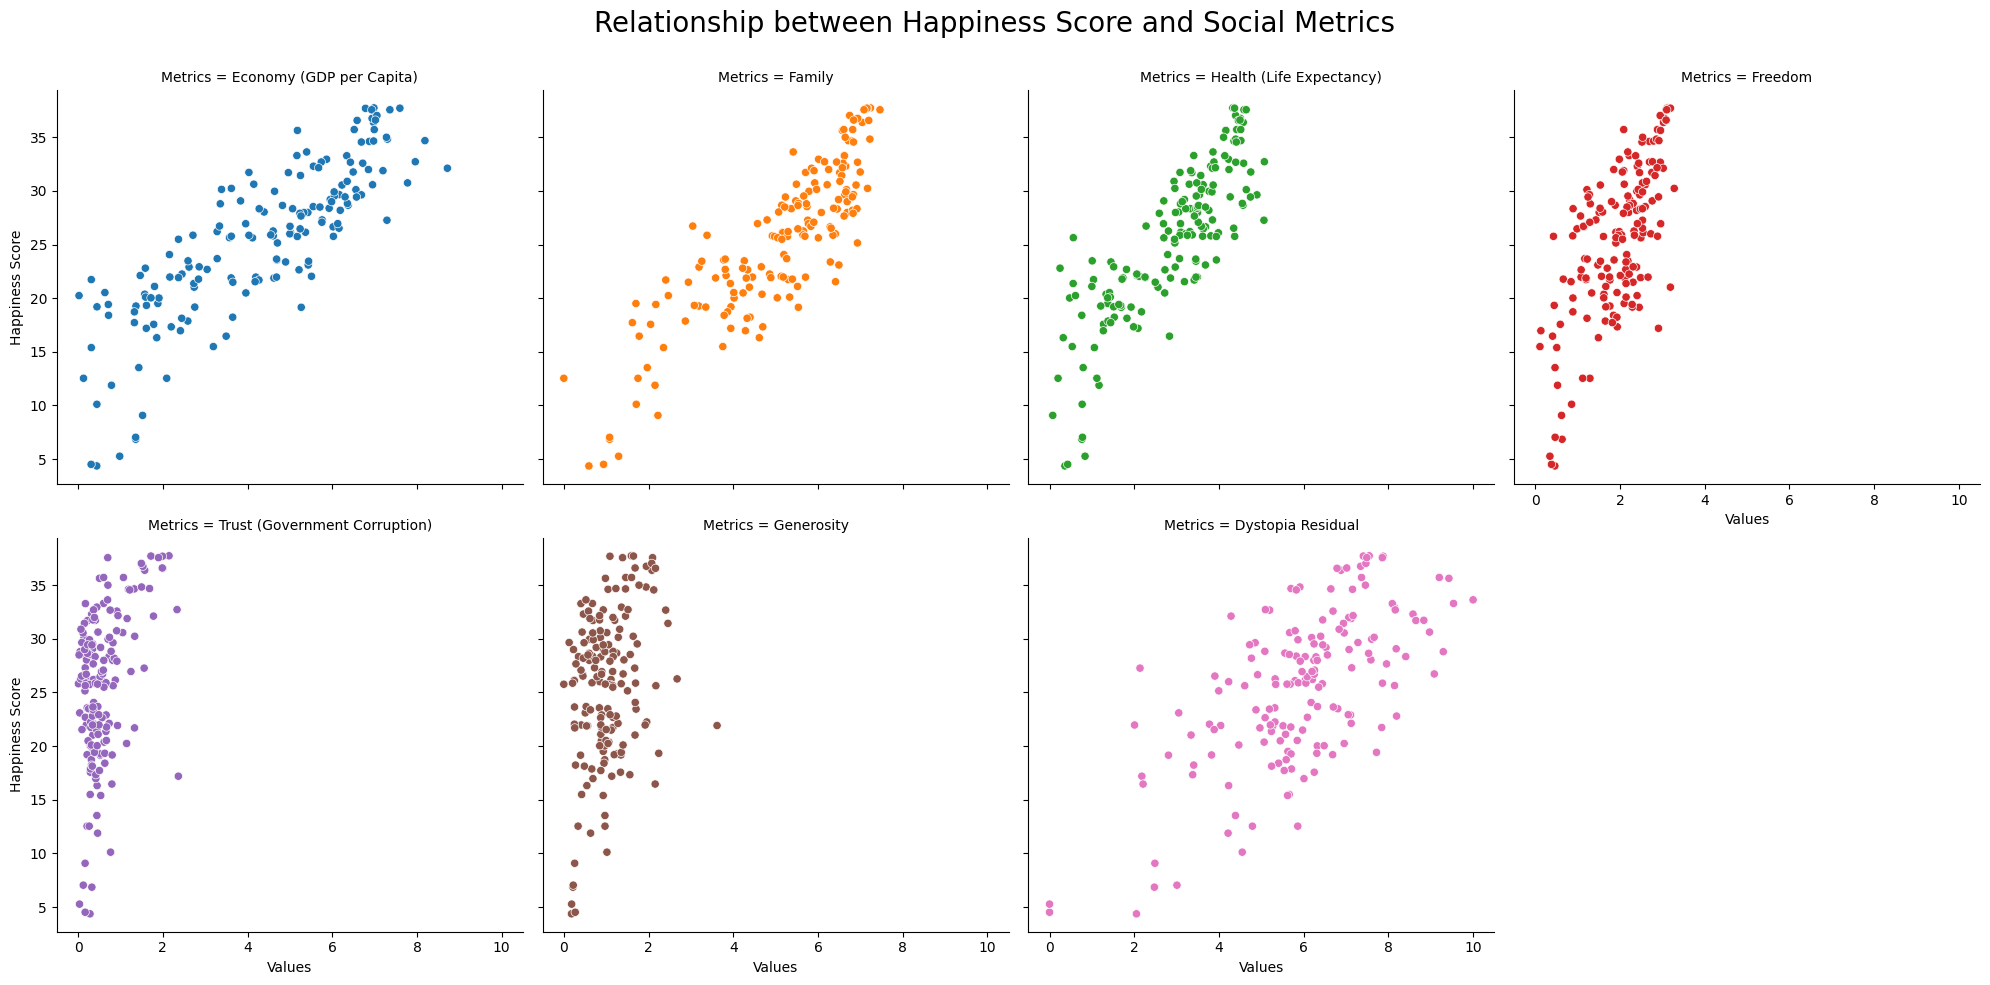

In [ ]:
#filter data for plot
scatter_df = world_df.iloc[:,[1,4, 5, 6, 7, 8, 9, 10, 11]].groupby('Country').sum().reset_index()

#pivot df
scatter_pivot = scatter_df.melt(id_vars=['Country', 'Happiness Score'], var_name='Metrics', value_name='Values')

#create scatterplot & grid by metrics
sns.relplot(scatter_pivot, x='Values', y='Happiness Score', hue='Metrics', col='Metrics', col_wrap=4, legend=False)
plt.suptitle('Relationship between Happiness Score and Social Metrics', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

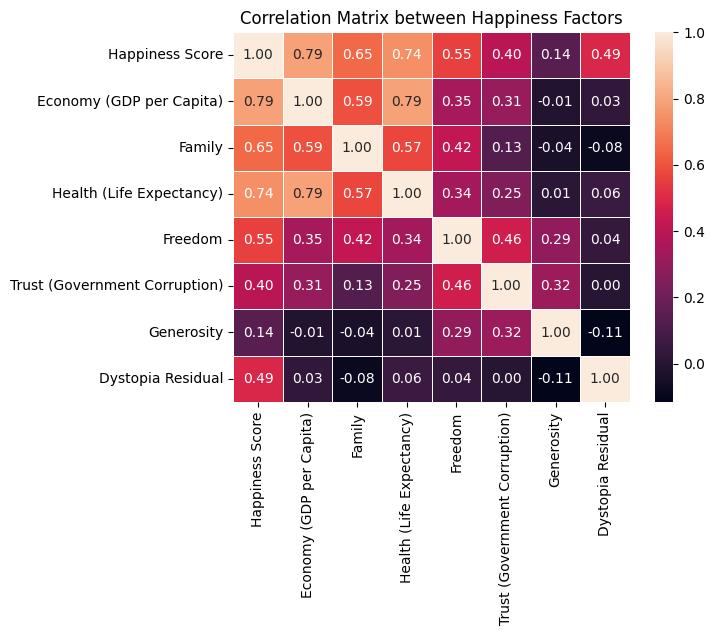

In [ ]:
sns.heatmap(world_df.iloc[:,4:12].corr(), linewidths=0.5, linecolor="white", fmt='.2f', annot=True)
plt.title('Correlation Matrix between Happiness Factors')
plt.show()

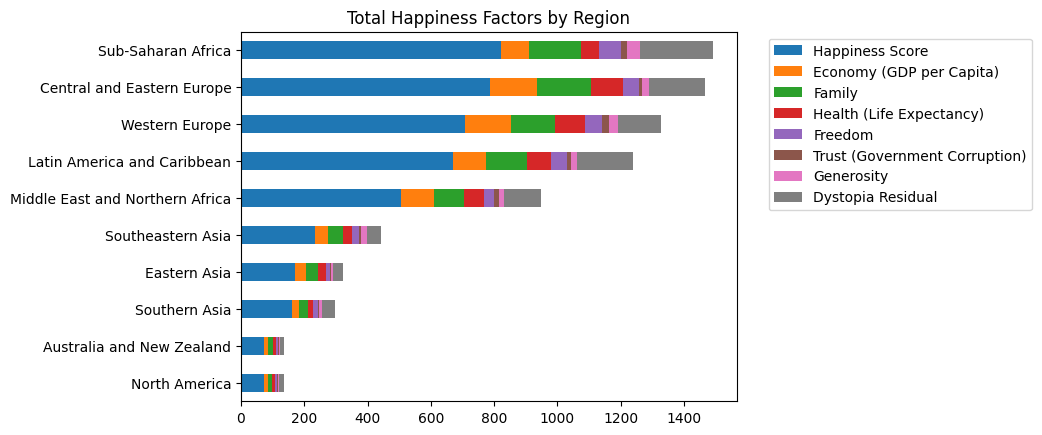

In [ ]:
#prep data for chart
reg_df = world_df.iloc[:,[2, 4, 5, 6, 7, 8, 9, 10, 11]].groupby('Region').sum()

# get total of factors
reg_df['Total'] = reg_df.sum(axis=1)

# sort df by desc order by total
reg_df.sort_values('Total', inplace=True)

#plot 
reg_df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]].plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Total Happiness Factors by Region')
plt.ylabel('')
plt.show()

In [ ]:
#prep dfs
#top 10 happiest country by avg happiness rank
tops = world_df.groupby(['Country', 'Region'])[['Happiness Rank', 'Happiness Score']].mean().nsmallest(10, 'Happiness Rank').reset_index()

tops['Average Happiness Rank'] = tops['Happiness Rank']
tops['Happiness Rank'] = list(range(1,11))


#bottom 10 happiest country by avg happiness rank
bots = world_df.groupby(['Country', 'Region'])[['Happiness Rank', 'Happiness Score']].mean().nlargest(10, 'Happiness Rank').reset_index()

bots['Average Happiness Rank'] = bots['Happiness Rank']
bots['Happiness Rank'] = list(range(1,11))

#merge both dfs
ranks_df = pd.concat([tops,bots], join='outer').reset_index(drop=True).rename(columns={'Happiness Rank': 'Overall Happiness Rank', 'Happiness Score': 'Average Happiness Score'})

#assign colors
rank_colors = ['green' if float(x) > 5 else 'red' for x in ranks_df['Average Happiness Score']]

#plot chart
fig = px.bar(ranks_df, x='Average Happiness Score', y='Country', color=rank_colors, color_discrete_map='identity', 
             custom_data=['Country','Region','Overall Happiness Rank','Average Happiness Rank'],
             title='<b>Overall Top and Bottom 10 Happiest Countries', height=700, width=900)

fig.update_traces(hovertemplate = 
                "<b>Rank: %{customdata[2]}</b><br>" +
                "<b>%{customdata[0]}</b><br>" +
                "<b>%{customdata[1]}</b><br><br>" +
                "Average Happiness Rank: %{customdata[3]:,.2f}<br>" +
                "Average Happiness Score: %{x:.2f}<br>" +
                "<extra></extra>")

fig.update_yaxes(title=None,autorange="reversed")
fig.show()

In [ ]:
#assign colors
bar_colors = []

for x in total_chs_co['Overall']:
    if x > 0: 
        bar_colors.append('green')
    else: 
        bar_colors.append('red')

#create bar chart of percent changes
fig = px.bar(total_chs_co, x= 'Country', y='Overall', color=bar_colors, color_discrete_map='identity', 
             title='<b>Total Percent Change of Countries Happiness Score', height=700)
fig.update_traces(hovertemplate='%{x}<br>%{y:,.2f}%')
fig.update_xaxes(categoryorder='category ascending', title=None, showticklabels=False)
fig.update_yaxes(title='Percentage Change', ticksuffix='%')
fig.show()